# HANDWRITTEN DIGIT RECOGNITION

IMPORTING THE DATASET

In [1]:
from keras.datasets import mnist

# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

print (x_train.shape)

(60000, 28, 28)


In [2]:
# printing the number of samples in x_train, x_test, y_train, y_test
print("Initial shape or dimensions of x_train", str(x_train.shape))

print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))
print()
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print()
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

Initial shape or dimensions of x_train (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000

Dimensions of x_train:(28, 28)
Labels in x_train:(60000,)

Dimensions of x_test:(28, 28)
Labels in y_test:(10000,)


## DISPLAY OF SOME RANDOM DATA using Opencv


In [16]:
# Using OpenCV
# import opencv and numpy
import cv2 
import numpy as np

# Use OpenCV to display 6 random images from our dataset
for i in range(0,6):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    window_name = 'Random Sample #' + str(i)
    cv2.imshow(window_name, img)
    cv2.waitKey(0)

cv2.destroyAllWindows()     

In C:\Users\sanka\anaconda3\envs\env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\sanka\anaconda3\envs\env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\sanka\anaconda3\envs\env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\sanka\anaconda3\envs\env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\sanka\anaconda3\envs\env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


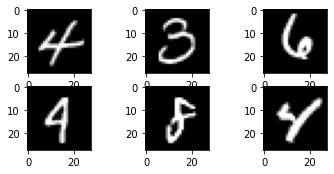

In [4]:

# importing matplot lib
import matplotlib.pyplot as plt

# Plots 6 images, note subplot's arugments are nrows,ncols,index
# we set the color map to grey since our image dataset is grayscale
plt.subplot(331)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(332)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

# Display out plots
plt.show()

In [5]:
# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]


# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### ONE HOT ENCODING

In [6]:
from keras.utils import np_utils

# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


In [7]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Creating the model

In [8]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD 

# create model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

### Traing the model

In [14]:

batch_size = 1


history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = 10,
                    verbose = 1,
                    validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
60000/60000 [==============================] - 362s 6ms/step - loss: 0.2244 - accuracy: 0.9313 - val_loss: 0.0607 - val_accuracy: 0.9806
Epoch 2/10
60000/60000 [==============================] - 352s 6ms/step - loss: 0.1082 - accuracy: 0.9686 - val_loss: 0.0416 - val_accuracy: 0.9861
Epoch 3/10
60000/60000 [==============================] - 348s 6ms/step - loss: 0.0818 - accuracy: 0.9753 - val_loss: 0.0413 - val_accuracy: 0.9874
Epoch 4/10
60000/60000 [==============================] - 353s 6ms/step - loss: 0.0732 - accuracy: 0.9781 - val_loss: 0.0430 - val_accuracy: 0.9865
Epoch 5/10
60000/60000 [==============================] - 342s 6ms/step - loss: 0.0623 - accuracy: 0.9810 - val_loss: 0.0317 - val_accuracy: 0.9896
Epoch 6/10
60000/60000 [==============================] - 353s 6ms/step - loss: 0.0562 - accuracy: 0.9829 - val_loss: 0.0326 - val_accuracy: 0.9911
Epoch 7/10
60000/60000 [==============================] - 349s 6ms/step - loss: 0.0509 - accuracy: 0.9843 - val_

### Plotting our loss charts

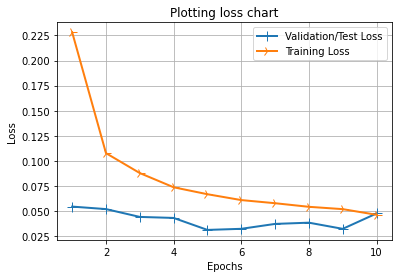

In [10]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.title('Plotting loss chart')
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

### Plotting our accuracy charts


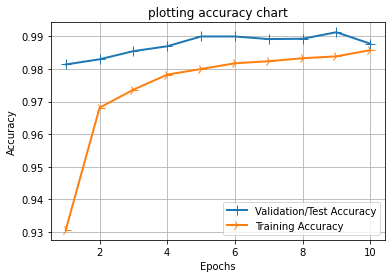

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.title('plotting accuracy chart')
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [12]:
model.save("CNN_model.h5")
print("Model Saved")

Model Saved


In [17]:
from keras.models import load_model

classifier = load_model('CNN_model.h5')


In [18]:
import cv2
import numpy as np


def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


for i in range(0,20):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1) 
    
    ## Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])

    draw_test("Prediction", res, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [19]:
import numpy as np
import cv2
from preprocessors import x_cord_contour, makeSquare, resize_to_pixel
       
image = cv2.imread('numbers.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imshow("image", image)
cv2.waitKey(0)

# Blur image then find edges using Canny 
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
#cv2.imshow("blurred", blurred)
#cv2.waitKey(0)

edged = cv2.Canny(blurred, 30, 150)
#cv2.imshow("edged", edged)
#cv2.waitKey(0)

# Find Contours
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Sort out contours left to right by using their x cordinates
contours = sorted(contours, key = x_cord_contour, reverse = False)

# Create empty array to store entire number
full_number = []

# loop over the contours
for c in contours:
    # compute the bounding box for the rectangle
    (x, y, w, h) = cv2.boundingRect(c)    

    if w >= 5 and h >= 25:
        roi = blurred[y:y + h, x:x + w]
        ret, roi = cv2.threshold(roi, 127, 255,cv2.THRESH_BINARY_INV)
        roi = makeSquare(roi)
        roi = resize_to_pixel(28, roi)
        cv2.imshow("ROI", roi)
        roi = roi / 255.0       
        roi = roi.reshape(1,28,28,1) 

        ## Get Prediction
        res = str(classifier.predict_classes(roi, 1, verbose = 0)[0])
        full_number.append(res)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(image, res, (x , y + 155), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0), 2)
        cv2.imshow("image", image)
        cv2.waitKey(0) 
        
cv2.destroyAllWindows()
print ("The number is: " + ''.join(full_number))

The number is: 13540
